In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
labels=['Open','High','Low','Volume','OpenInt']

In [4]:
ip = pd.read_csv(open(r"C:\Users\Administrator\Desktop\fda\SVR\AAPL历史数据.csv"))

In [5]:
ip

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2000年1月3日,1.00,0.94,1.00,0.91,535.82M,8.70%
1,2000年1月4日,0.92,0.97,0.99,0.90,511.73M,-8.00%
2,2000年1月5日,0.93,0.93,0.99,0.92,778.32M,1.09%
3,2000年1月6日,0.85,0.95,0.96,0.85,767.98M,-8.60%
4,2000年1月7日,0.89,0.86,0.90,0.85,460.73M,4.71%
5,2000年1月10日,0.87,0.91,0.91,0.85,505.06M,-2.25%
6,2000年1月11日,0.83,0.86,0.89,0.81,441.49M,-4.60%
7,2000年1月12日,0.78,0.85,0.85,0.77,976.07M,-6.02%
8,2000年1月13日,0.86,0.84,0.88,0.83,1.03B,10.26%
9,2000年1月14日,0.90,0.89,0.91,0.89,390.38M,4.65%


In [6]:
y=ip['收盘']
X=ip.drop('收盘',axis=1).drop('日期',axis=1).drop('交易量',axis=1).drop('涨跌幅',axis=1)


In [110]:
#将数据转化到（0,1）
"""
具体的转化方式：
 X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 X_scaled = X_std * (max - min) + min

""""""
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(X))
X=scaler.transform(X)""""""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-110-890225cfc4d7>, line 11)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [8]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
pred = regressor.predict(X_test)

In [114]:
pred

array([ 0.31844812,  0.354907  ,  8.57758971, 19.44665192, 19.51847118,
        0.29658028, 28.25236997, 29.21580839, 28.63620114,  3.95473066,
       29.05327535,  0.29175901, 27.21329606,  7.18939294, 13.76992321,
       29.0639886 , 19.40984986,  0.30573974, 26.89577935, 13.3362606 ,
        0.7602505 ,  1.05195035,  1.04062464, 39.23829844, 14.01356329,
       21.08696401,  3.11204782,  4.55731922,  0.30025247, 35.42648807,
        1.12076502,  0.29100041, 16.13683168,  0.36263357, 23.887483  ,
       42.93990287,  9.41024868,  0.2957962 ,  0.29870133,  0.37686596,
        0.29853886,  6.21267367,  1.26990593, 15.66457774,  7.00933432,
       50.33936879,  0.40085482, 47.70110626, 16.18099339, 40.04676109,
        1.10663485, 15.89984867,  0.30236762,  0.29413024,  0.87892981,
       11.24014313,  1.92165795,  5.7088823 , 30.99966765, 15.05941959,
        0.354907  ,  4.3481839 , 23.71373723,  6.69544217, 42.04988973,
        8.30708168, 53.97937032,  1.41264599,  4.62983616, 23.59

In [10]:
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred)))
test_set_r2=r2_score(y_test,pred)
test_set_mae=mean_absolute_error(y_test,pred)

print(test_set_rmse)
print(test_set_r2)
print(test_set_mae)

1.957839608023818
0.9842545609900628
0.336097990090199


In [11]:
type(y_test)


pandas.core.series.Series

In [17]:
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [26]:
X_test[:,1] #y_test[]


array([ 0.42,  0.27,  8.58, 19.48, 19.65,  0.4 , 28.36, 29.36, 28.96,
        3.93, 29.18,  0.37, 27.61,  7.2 , 14.06, 29.13, 19.53,  0.42,
       27.05, 13.38,  0.73,  1.01,  0.98, 39.63, 14.11, 21.33,  3.05,
        4.61,  0.4 , 35.59,  1.07,  0.35, 16.35,  0.26, 24.14, 43.27,
        9.44,  0.39,  0.39,  0.25,  0.33,  6.11,  1.33, 15.75,  7.07,
       52.14,  0.5 , 47.99, 16.42, 40.85,  1.08, 16.04,  0.4 ,  0.37,
        0.83, 11.21,  1.93,  5.66, 31.23, 15.25,  0.27,  4.35, 23.92,
        6.87, 42.94,  8.28, 55.31,  1.51,  4.67, 23.88,  0.44,  0.27,
       47.99, 25.38, 29.81, 27.84, 28.68,  4.65,  0.85,  2.2 ,  0.44,
        0.27, 14.59, 20.43, 18.65,  6.3 ,  2.16,  0.8 ,  0.35, 28.07,
       25.47, 38.62,  2.9 , 37.21, 28.2 ,  3.44, 15.56,  7.69,  0.38,
        7.27,  0.39, 23.92, 30.66, 17.56, 24.19,  5.04, 57.35,  3.28,
        6.21, 38.33,  3.27,  9.13,  9.86,  0.58, 14.62, 53.01,  1.03,
        0.38,  5.19,  3.22, 18.96, 32.38, 18.93,  7.05, 12.7 , 16.23,
        0.47,  3.01,

In [30]:

len1 = len(pred)

print(type(X_test))
profit = 0
for i in range(len1):
    if(pred[i] > X_test[i][0] ):
        profit += y_test[i] - X_test[i][0]
print("每股收益为：")
profit


<class 'numpy.ndarray'>
每股收益为：


21.439999999999984

In [ ]:
### 开心，这意味着买入10000股apple 股票 可以赚21万美元

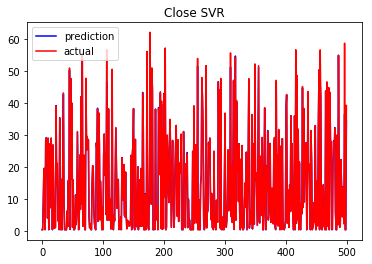

In [31]:
x=np.arange(0,500)
plt.title('Close SVR')
plt.plot(x,pred,'b-',label='prediction')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

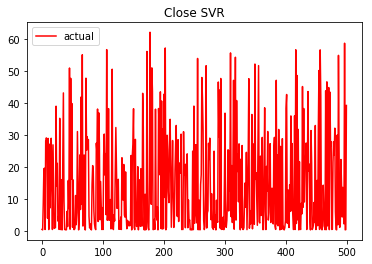

In [32]:
x=np.arange(0,500)
plt.title('Close SVR')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

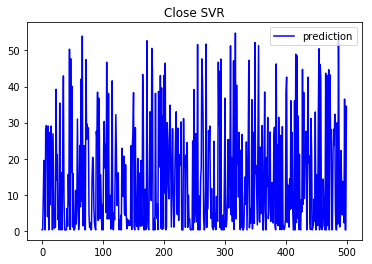

In [33]:
x=np.arange(0,500)
plt.title('Close SVR')
plt.plot(x,pred,'b-',label='prediction')
plt.legend()
plt.show()